# **Analysis of Global Suicide Mortality Rates (2001-2021)**  

---
## **Table of Contents**  
[INTRODUCTION](#Introduction)  
[OBJECTIVES](#Objectives)
[DATA SOURCE](#Data_source)
[KEY FINDINGS](#Key_findings)
[CONCLUSION](#Conclusion) 

---
### **INTRODUCTION**
Suicide is a critical global public health issue, with varying trends across countries and years. This report examines mortality rates from 2001 to 2021 using the *World_suicide* dataset from Kaggle. The dataset contains yearly suicide mortality figures across multiple countries, providing insight into geographical, temporal and pandemic_related patterns. Using Python's **pandas** library, this analysis explores data quality (duplicates, missing values), compares suicide trends among countries, and identifies high-risk periods and regions. The goal is to better understand global suicide patterns and provide a solid basis for further public health analysis.  

---
#### **OBJECTIVES**
This analysis aims to:
1. Determine whether the dataset contains duplicate entries
2. Identify missing values across all variables
3. Determine the year Nigeria recorded its highest suicide mortality rate
4. Count the number of countries present in the dataset
5. Identify the country with the highest suicide mortality rate globally
6. Compare suicide mortality rates between Nigeria and Niger in 2015
7. Determine the country with the highest suicide rate during the COVID-19 year (2020)
8. Identify the highest recorded mortality rate for each country
9. Count the number of countries with suicide mortality rates greater than 20 between 2005 and 2010

---
##### **DATA SOURCE**
This data was downloaded from [Kaggle.com]()
Columns included: `Country Name`, `Country Code`, `Year`, `Suicide Rate`.

---
###### **KEY FINDINGS**
>- Are there any duplicate entries in the dataset?
    - Yes. There are **1,892 duplicate rows**
>- Are there any missing values in the dataset?
    - No. All columns (`Country Name`, `Country Code`, `Year`, `Suicide Rate`) have **0 missing values**
>- In which year did Nigeria record its highest mortality rate?
    - Nigeria's highest recorded suicide mortality rate in the dataset is **5.37** in **2001**
>- How many countries are in the dataset?
    - The dataset contains **233 unique countries**
>- Which country has the highest suicide mortality rate?
    - **Russian Federation** - Highest recorded rate **51.79** in **2001**
>- Between Nigeria and Niger, which country recorded a higher suicide mortality rate in 2015?
    - The dataset contains a 2015 record for **Nigeria** with a suicide rate of **4.46**. There is **no 2015 record for Niger** in the filtered result (so Nigeria is higher in 2015 between the two, due to available records)
>- Which country recorded the highest suicide rate in the COVID-19 year (2020)?
    - **Suriname** recorded the highest suicide mortality rate in **2020**, with **28.47**.
>- What is the highest mortality rate for each country?
    - Computation of the maximum suicide rate for the **top 20 countries** will be displayed with their respective suicide rates in a table format below
>- How many countries recorded suicide mortality rates greayer than 20 between 2005 and 2010?
    - **23 countries** had at least one year with a suicide mortality rate **>20** during 2005-2010

---
###### **CONCLUSION**
The dataset is complete (no missing values) but contains substantial duplicate rows. Russia shows the highest single suicide mortality rate (51.79 in 2001). Nigeria's peak in the data was modest (5.37 in 2001). During the COVID-19 year of 2020, Suriname had the highest recorded rate (28.47). Between 2005-2010, 23 countries had rates above 20.
The dataset reveals that suicide mortality is a complex global issue shaped by economic, cultural, and health-system factors. Each country follows a unique trajectory, and international comparison shows striking differences. The COVID-19 pandemic year marked significant changes, reinforcing the importance of mental-health interventions during global crises.
Overall, the analysis provides a strong basis for policymakers, researchers, and public-health practitioners to understand where intervention is most urgently needed and which countries or years require deeper investigation.

---
###### ***Code behind my work***

# **Statistical analysis**

In [1]:
import pandas as pd

In [2]:
World_suicide = pd.read_csv(r"C:\Users\DELL\Documents\bluetooth\world_suicide.csv")
World_suicide

,Country Name,Country Code,Year,Suicide Rate
0,South Asia (IDA & IBRD),TSA,2010,14.519217
1,Spain,ESP,2014,8.600000
2,Vanuatu,VUT,2010,16.920000
3,Guatemala,GTM,2005,9.020000
4,Africa Western and Central,AFW,2005,5.567678
...,...,...,...,...
5212,Africa Western and Central,AFW,2012,5.850095
5213,Central Europe and the Baltics,CEB,2013,17.062501
5214,El Salvador,SLV,2000,7.680000
5215,Pacific island small states,PSS,2004,12.760230


In [ ]:
# To check for duplicate entries/rows
duplicates = World_suicide.duplicated().sum()
duplicates

np.int64(1892)

In [4]:
# To check for missing values
missing_values = World_suicide.isnull().sum()
missing_values

Country Name    0
Country Code    0
Year            0
Suicide Rate    0
dtype: int64

In [5]:
# To check for the year that nigeria recorded its highest suicide mortalty rate
nigeria_peak = World_suicide[World_suicide['Country Name'] == 'Nigeria'].sort_values('Suicide Rate', ascending=False).head(1)
nigeria_peak

,Country Name,Country Code,Year,Suicide Rate
1618,Nigeria,NGA,2001,5.37


In [6]:
# To find the number of countries in the dataset
countries_count = World_suicide['Country Name'].nunique()
countries_count

233

In [7]:
# To check for the country with the highest suicide mortality rate
highest_country = World_suicide.loc[World_suicide['Suicide Rate'].idxmax()]
highest_country

Country Name    Russian Federation
Country Code                   RUS
Year                          2001
Suicide Rate                 51.79
Name: 1401, dtype: object

In [8]:
# To check for Nigeria VS Niger in 2015
compare_2015 = World_suicide[(World_suicide['Year'] == 2015) & (World_suicide['Country Name'].isin(['Nigeria','Niger']))]
compare_2015

,Country Name,Country Code,Year,Suicide Rate
3652,Nigeria,NGA,2015,4.46


In [11]:
# To check for the highest mortality rate in COVID-19 year (2020)
covid_2020 = World_suicide[World_suicide['Year'] == 2020]
country_covid_peak = covid_2020.loc[covid_2020['Suicide Rate'].idxmax()]
country_covid_peak

Country Name    Suriname
Country Code         SUR
Year                2020
Suicide Rate       28.47
Name: 4721, dtype: object

In [12]:
# To check for the highest mortality rate for each country
highest_each_country = World_suicide.groupby('Country Name')['Suicide Rate'].max()
highest_each_country

Country Name
Afghanistan                     4.380000
Africa Eastern and Southern     7.953714
Africa Western and Central      5.871657
Albania                         7.090000
Algeria                         4.180000
                                 ...    
West Bank and Gaza              0.920000
World                          12.507066
Yemen, Rep.                     5.800000
Zambia                          7.130000
Zimbabwe                       17.340000
Name: Suicide Rate, Length: 233, dtype: float64

In [ ]:
# To check for countries with suicide rates greater than 20 (>20) between 2005 and 2010
countries_greater_20 = (World_suicide['Year'] >= 2005) & (World_suicide['Year'] <= 2010) & (World_suicide['Suicide Rate'] > 20)
countries_gt_20 = World_suicide[countries_greater_20] ['Country Name'].nunique()
countries_gt_20

23

In [2]:
import pandas as pd
world_suicide = pd.read_excel(r"C:\Users\DELL\Documents\bluetooth\API_SH.STA.SUIC.P5_DS2_en_excel_v2_11048 (3).xls",
skiprows=3
)
world_suicide
uniq_country = world_suicide["Country Name"].nunique
uniq_country
col_to_drop = world_suicide.loc[:,"1960":"1999"].columns
world_suicide = world_suicide.drop(columns=col_to_drop)
col_to_unpivot = world_suicide.iloc[:,4:].columns
col_to_retain = world_suicide.iloc[:,:2].columns
reshaped = world_suicide.melt(value_vars=col_to_unpivot,id_vars=col_to_retain, var_name="Year",value_name="suicide rate")
reshaped
Countries  = reshaped.query(
"""    `Country Name` == "Nigeria"
   or
   `Country Name` == "Angola"
   or
   `Country Name` == "United States"
   or
   `Country Name` == "Ghana"
   """.replace("\n","")
   )
Countries
#reshaped

,Country Name,Country Code,Year,suicide rate
4,Angola,AGO,2000,9.12
83,Ghana,GHA,2000,3.41
174,Nigeria,NGA,2000,5.27
251,United States,USA,2000,11.17
270,Angola,AGO,2001,8.48
...,...,...,...,...
6369,United States,USA,2023,NaN
6388,Angola,AGO,2024,NaN
6467,Ghana,GHA,2024,NaN
6558,Nigeria,NGA,2024,NaN


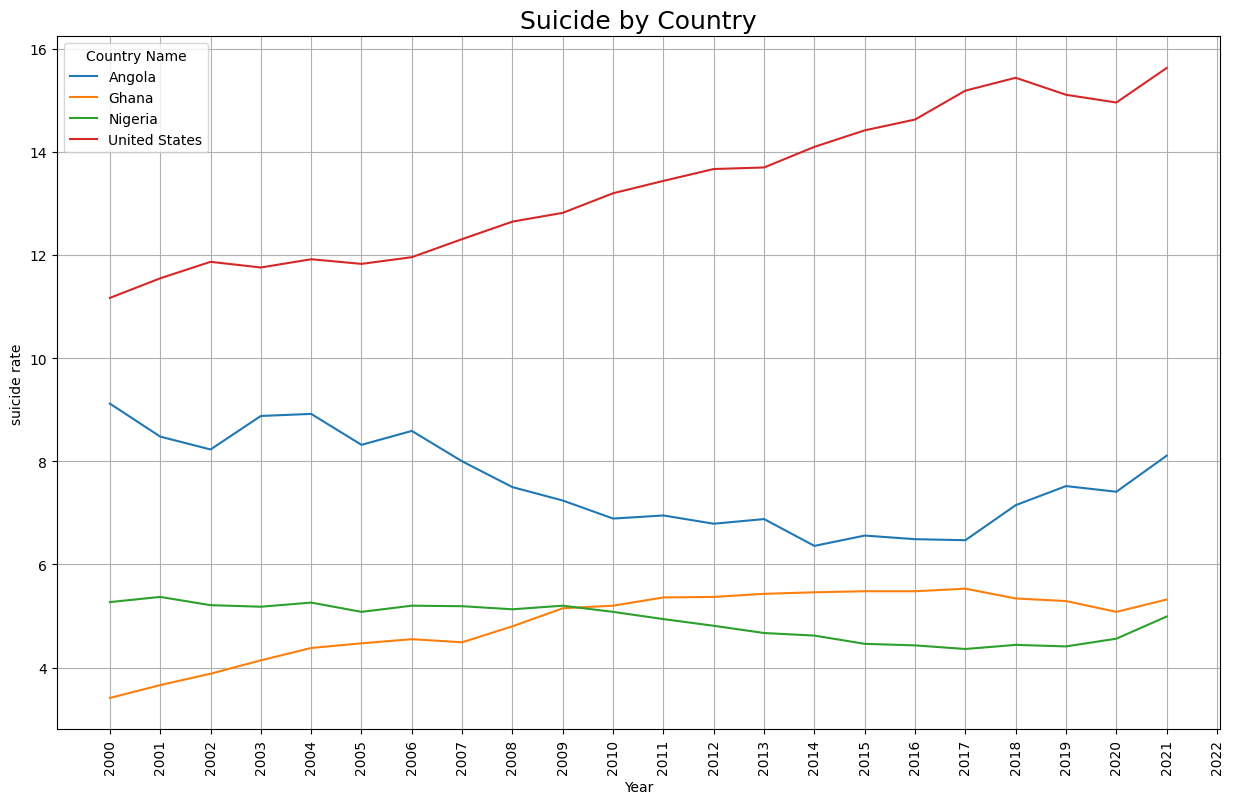

In [3]:
# Graphical representation of World Suicide across Nigeria, Ghana, Angola and the United States
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
sns.lineplot(data=Countries,
             x="Year",
             y="suicide rate",
             errorbar=None,
             hue="Country Name")
plt.xticks(rotation=90)
plt.grid(True)
plt.title("Suicide by Country",
          fontsize=18)
plt.show()
#plt.savefig(r"C:\Users\DELL\Documents\GitHub\Assignment\suicide.png")